In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
from sklearn import linear_model,metrics
from sklearn.model_selection import train_test_split
import math

In [4]:
df = pd.read_csv("temperatures.csv")
df.head(5)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [5]:
col = df.loc[ : , "JAN":"DEC"]

In [6]:
col

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49
1,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04
2,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65
3,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63
4,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82
...,...,...,...,...,...,...,...,...,...,...,...,...
112,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37
113,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08
114,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67
115,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01


In [7]:
df['AVERAGE'] = col.mean(axis=1)
df.head(5)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC,AVERAGE
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25,28.995833
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49,29.218333
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26,28.628333
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40,28.487500
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57,28.528333


In [8]:
data = df[['YEAR','AVERAGE']]
data.head(5)

,YEAR,AVERAGE
0,1901,28.995833
1,1902,29.218333
2,1903,28.628333
3,1904,28.487500
4,1905,28.528333


In [9]:
## [A]. Apply Linear Regression using suitable library function 

x_train,x_test,y_train,y_test = train_test_split(data.YEAR, data.AVERAGE, test_size=0.20,random_state=10)

reg = linear_model.LinearRegression()
reg.fit(np.array(x_train).reshape(-1,1),y_train)   # (DataFrame, series)

LinearRegression()

In [10]:
# y = m*x + c
print("Coefficient: ",reg.coef_[0]) #  coefficient ( m )
print("Intercept: ",reg.intercept_) #  Intercept ( c )

Coefficient:  0.0129716978099355
Intercept:  3.7842962594625007


In [11]:
## [B]. Assess the performance of regression models using MSE, MAE and R-Square metrics
MAE = metrics.mean_absolute_error(y_test,reg.predict(np.array(x_test).reshape(-1,1))) # MAE
print("MEAN ABSOLUTE ERROR: ", MAE)
MSE = metrics.mean_squared_error(y_test,reg.predict(np.array(x_test).reshape(-1,1))) # MSE
print("MEAN SQUARE ERROE: ", MSE)
RMSE = math.sqrt(MSE) 
print("ROOT MEAN SQUARE ERROR : ", RMSE)

MEAN ABSOLUTE ERROR:  0.22412971094635278
MEAN SQUARE ERROE:  0.08022676294018138
ROOT MEAN SQUARE ERROR :  0.28324329284235733


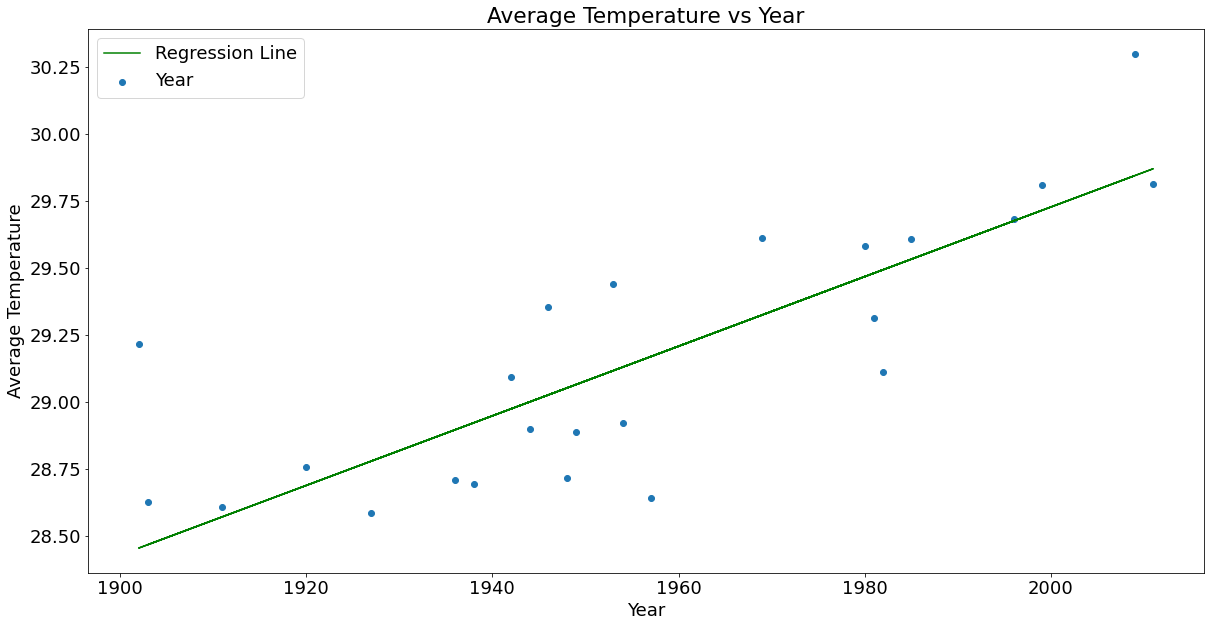

In [12]:
## [C]. Visualize simple regression model.
%matplotlib inline
plt.figure(figsize=(20,10))
plt.rc("font",size=18)
plt.title("Average Temperature vs Year")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.scatter(x_test,y_test)
plt.plot(x_test,reg.predict(np.array(x_test).reshape(-1,1)), color="g")
plt.legend(["Regression Line","Year"])